In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-03-23 17:53:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-23 17:53:55 (84.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip 

unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2023-03-23 17:53:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 64.233.191.128, 173.194.74.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   135MB/s    in 12s     

2023-03-23 17:54:10 (132 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)
                                                                                
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False) # don't shuffle test data for prediction analysis

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip


--2023-03-23 17:54:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.196.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip’

06_101_food_class_1 100%[===================>]  44.59M   155MB/s    in 0.3s    

2023-03-23 17:54:35 (155 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip’ saved [46760742/46760742]



In [ ]:
saved_model_path = "/content/06_101_food_class_10_percent_saved_big_dog_model.zip"
unzip_data(saved_model_path)

In [ ]:
model = tf.keras.models.load_model("/content/06_101_food_class_10_percent_saved_big_dog_model")

In [ ]:
results_downloaded = model.evaluate(test_data)
results_downloaded

790/790 [==============================] - 73s 79ms/step - loss: 1.8027 - accuracy: 0.6078


[1.8027204275131226, 0.6077623963356018]

In [ ]:
predicted_probs = model.predict(test_data, verbose = 1)

790/790 [==============================] - 62s 77ms/step


In [ ]:
print(f"length of predicted probabilities :{len(predicted_probs)}")
print(f"Predicted probabilities look like: {predicted_probs[0]}")
print(f"predicted value of first: {predicted_probs[0].argmax()}")
predicted_probs[0][52]

length of predicted probabilities :25250
Predicted probabilities look like: [5.95422499e-02 3.57421641e-06 4.13771868e-02 1.06605680e-09
 8.16142265e-09 8.66399219e-09 8.09274582e-07 8.56526867e-07
 1.98591733e-05 8.09777873e-07 3.17277227e-09 9.86742407e-07
 2.85322807e-04 7.80494447e-10 7.42302567e-04 3.89163870e-05
 6.47404477e-06 2.49773825e-06 3.78912555e-05 2.06783156e-07
 1.55384569e-05 8.15072838e-07 2.62307503e-06 2.00107493e-07
 8.38279675e-07 5.42160024e-06 3.73910780e-06 1.31505740e-08
 2.77615967e-03 2.80519544e-05 6.85622448e-10 2.55749364e-05
 1.66889979e-04 7.64073860e-10 4.04531223e-04 1.31507001e-08
 1.79573817e-06 1.44482760e-06 2.30628420e-02 8.24669542e-07
 8.53656331e-07 1.71387171e-06 7.05256616e-06 1.84021545e-08
 2.85534099e-07 7.94837069e-06 2.06816003e-06 1.85251395e-07
 3.36199406e-08 3.15226236e-04 1.04109558e-05 8.54483915e-07
 8.47418129e-01 1.05554591e-05 4.40948469e-07 3.74041920e-05
 3.53062715e-05 3.24890498e-05 6.73150862e-05 1.28526585e-08
 2.621974

0.8474181

In [ ]:
pred_class = predicted_probs.argmax(axis = 1)
pred_class[:10]

array([52,  0,  0, 80, 79, 61, 29,  0, 85,  0])

In [ ]:
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_labels[-10:]

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_sk = accuracy_score(y_labels, pred_class)
accuracy_sk

0.6077623762376237

In [ ]:
import numpy as np

np.isclose(results_downloaded[1], accuracy_sk)

True

In [ ]:
from helper_functions import make_confusion_matrix

In [ ]:
class_names = test_data.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

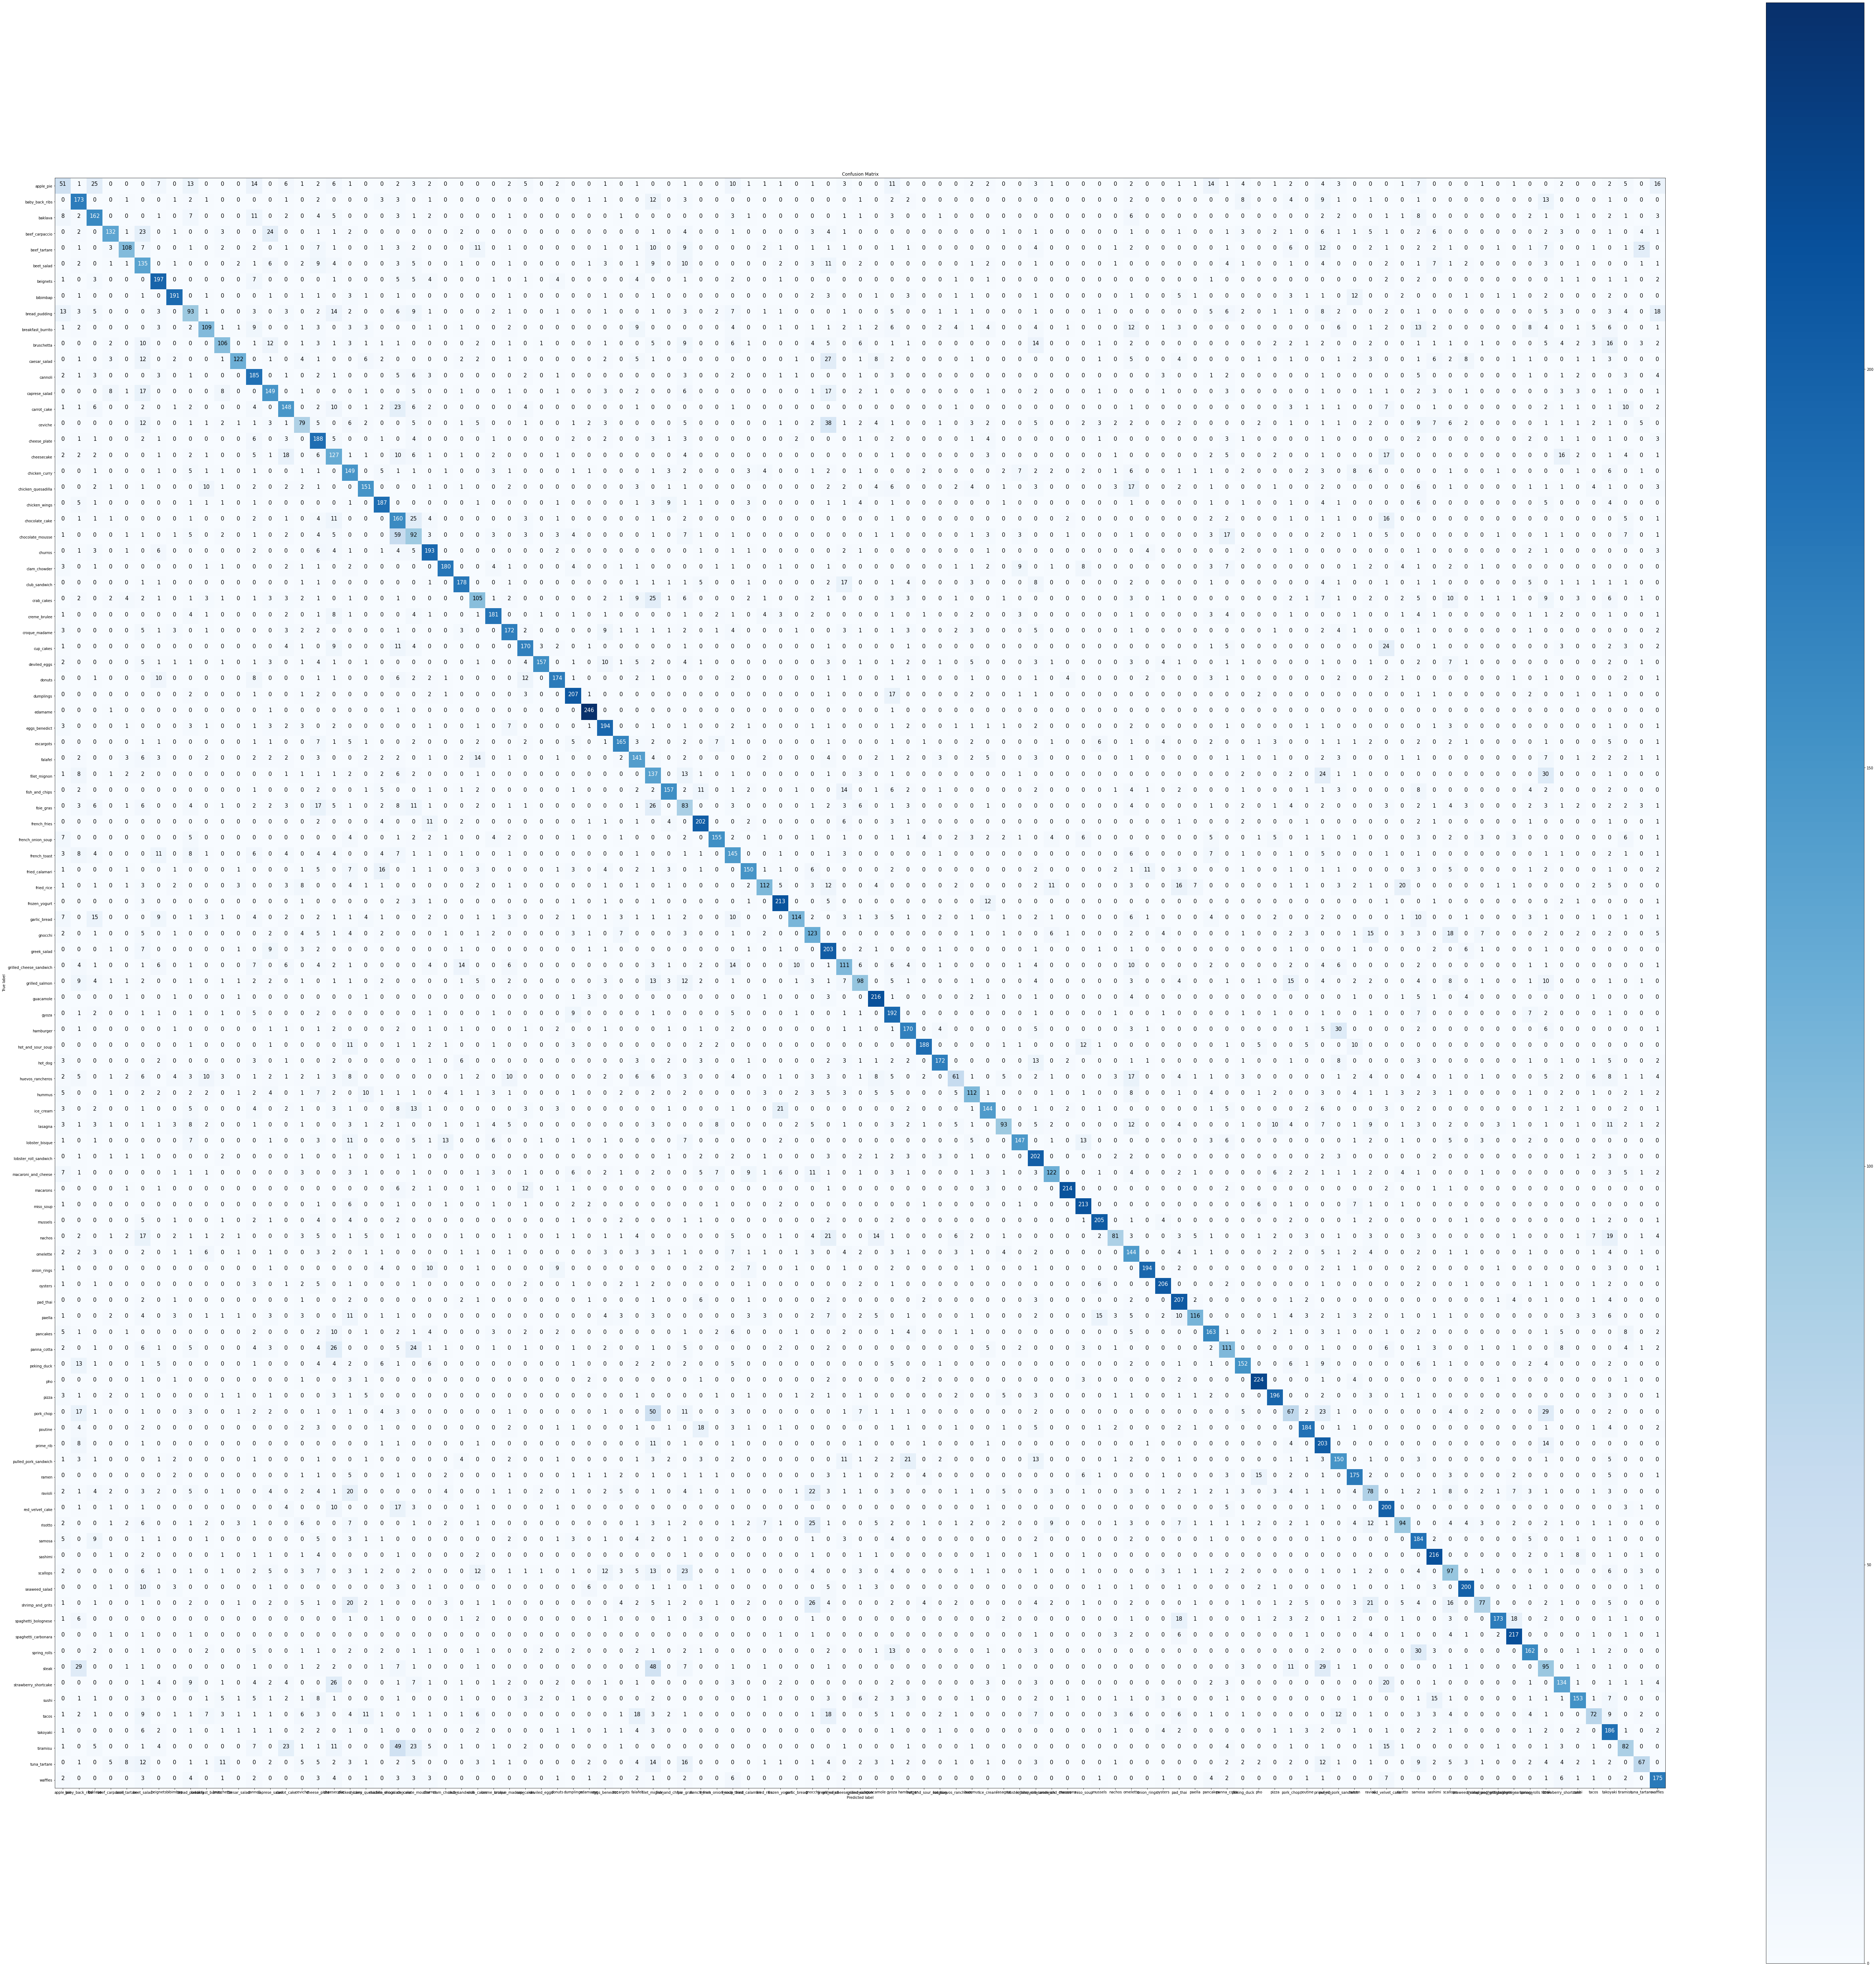

In [ ]:
make_confusion_matrix(y_labels, pred_class, classes = class_names, figsize=(100,100))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cr_dict = classification_report(y_labels, pred_class, output_dict = True)
cr_dict

{'0': {'precision': 0.29310344827586204,
  'recall': 0.204,
  'f1-score': 0.24056603773584903,
  'support': 250},
 '1': {'precision': 0.5088235294117647,
  'recall': 0.692,
  'f1-score': 0.5864406779661017,
  'support': 250},
 '2': {'precision': 0.5625,
  'recall': 0.648,
  'f1-score': 0.6022304832713754,
  'support': 250},
 '3': {'precision': 0.7415730337078652,
  'recall': 0.528,
  'f1-score': 0.616822429906542,
  'support': 250},
 '4': {'precision': 0.7346938775510204,
  'recall': 0.432,
  'f1-score': 0.544080604534005,
  'support': 250},
 '5': {'precision': 0.34177215189873417,
  'recall': 0.54,
  'f1-score': 0.41860465116279066,
  'support': 250},
 '6': {'precision': 0.6677966101694915,
  'recall': 0.788,
  'f1-score': 0.7229357798165138,
  'support': 250},
 '7': {'precision': 0.8197424892703863,
  'recall': 0.764,
  'f1-score': 0.7908902691511386,
  'support': 250},
 '8': {'precision': 0.4025974025974026,
  'recall': 0.372,
  'f1-score': 0.3866943866943867,
  'support': 250},
 '9

In [ ]:
f1_s = {}

for k, v in cr_dict.items():
  if k == "accuracy":
    break
  else:
    f1_s[class_names[int(k)]] = v["f1-score"]

f1_s

{'apple_pie': 0.24056603773584903,
 'baby_back_ribs': 0.5864406779661017,
 'baklava': 0.6022304832713754,
 'beef_carpaccio': 0.616822429906542,
 'beef_tartare': 0.544080604534005,
 'beet_salad': 0.41860465116279066,
 'beignets': 0.7229357798165138,
 'bibimbap': 0.7908902691511386,
 'bread_pudding': 0.3866943866943867,
 'breakfast_burrito': 0.5117370892018779,
 'bruschetta': 0.5047619047619047,
 'caesar_salad': 0.6161616161616161,
 'cannoli': 0.6105610561056106,
 'caprese_salad': 0.5775193798449612,
 'carrot_cake': 0.574757281553398,
 'ceviche': 0.36744186046511623,
 'cheese_plate': 0.5654135338345864,
 'cheesecake': 0.42546063651591287,
 'chicken_curry': 0.5008403361344538,
 'chicken_quesadilla': 0.6411889596602972,
 'chicken_wings': 0.7123809523809523,
 'chocolate_cake': 0.45261669024045265,
 'chocolate_mousse': 0.3291592128801431,
 'churros': 0.7134935304990757,
 'clam_chowder': 0.7708779443254817,
 'club_sandwich': 0.734020618556701,
 'crab_cakes': 0.4625550660792952,
 'creme_brulee

In [ ]:
import pandas as pd

pd_df = pd.DataFrame({"class_name": list(f1_s.keys()),
                      "f1-score" : list(f1_s.values())
}).sort_values("f1-score" ,ascending = False)

In [ ]:
pd_df

,class_name,f1-score
33,edamame,0.937143
63,macarons,0.895397
75,pho,0.866538
91,spaghetti_carbonara,0.847656
69,oysters,0.834008
...,...,...
56,huevos_rancheros,0.339833
22,chocolate_mousse,0.329159
77,pork_chop,0.308756
39,foie_gras,0.297491


<Axes: xlabel='f1-score', ylabel='class_name'>

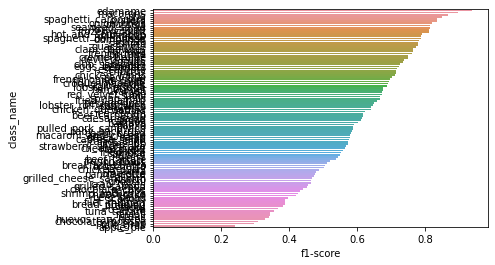

In [ ]:
import seaborn as sns

sns.barplot(data = pd_df, y = "class_name", x = "f1-score")

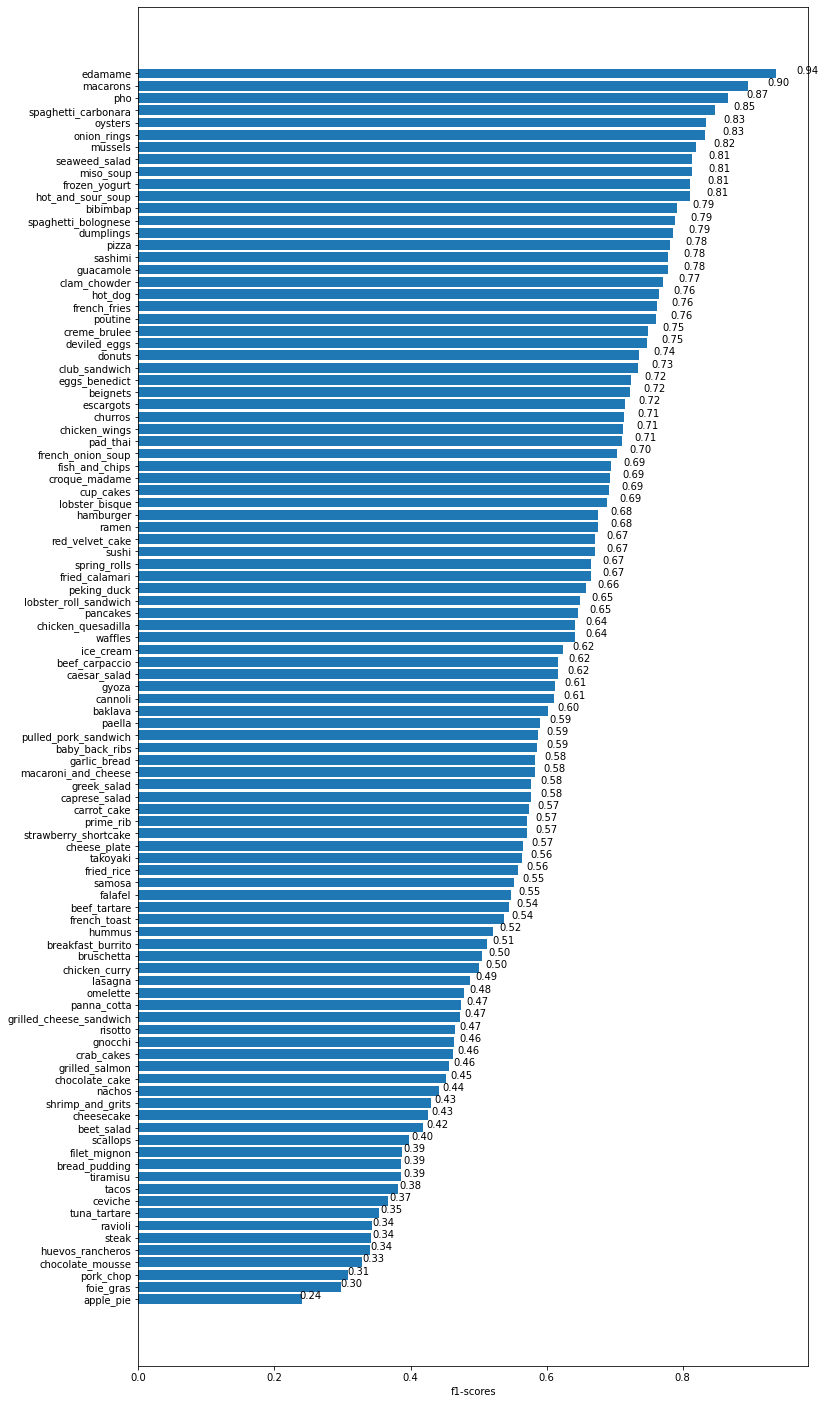

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,25))
score = ax.barh(range(len(pd_df)), pd_df["f1-score"].values, linewidth=1)

ax.set_yticks(range(len(pd_df["class_name"])))
ax.set_yticklabels(pd_df["class_name"])
ax.set_xlabel("f1-scores")
ax.invert_yaxis()

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        width = rect.get_width()
        ax.text(1.05*width, rect.get_y() + rect.get_height()/1.5,
                f"{width:.2f}",
                ha='center', va='bottom')
        
autolabel(score)

In [ ]:
def image_prep(filename, image_shape = 224, scale = True):
    """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """

    img = tf.io.read_file(filename)
    img = tf.io.decode_image(img, channels=3)
    img = tf.image.resize(img, [image_shape, image_shape])

    if scale:
      return img/255.
    else: 
      return img

101_food_classes_10_percent/test/onion_rings/1612987.jpg
1/1 [==============================] - 0s 33ms/step
101_food_classes_10_percent/test/falafel/452268.jpg
1/1 [==============================] - 0s 32ms/step
101_food_classes_10_percent/test/cheese_plate/940584.jpg
1/1 [==============================] - 0s 31ms/step


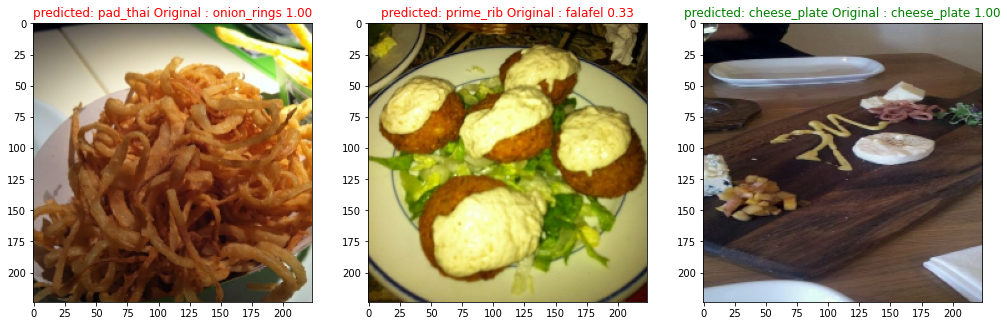

In [ ]:
import os 
import random

plt.figure(figsize=(17, 10))

for i in range(3):
  classn = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + classn))
  filepath = test_dir + classn + "/" + filename
  print(filepath)

  img = image_prep(filepath, scale = False) # keep scale = False as the model was trained with data which was not normalised
  pred_prob = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]

  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if(pred_class == classn):
    title_color = "g"
  else:
    title_color = "r"

  plt.title(f"predicted: {pred_class} Original : {classn} {pred_prob.max():.2f}", c = title_color)

101_food_classes_10_percent/test/fried_calamari/83599.jpg
1/1 [==============================] - 0s 172ms/step
101_food_classes_10_percent/test/strawberry_shortcake/2576734.jpg
1/1 [==============================] - 0s 115ms/step
101_food_classes_10_percent/test/pizza/790058.jpg
1/1 [==============================] - 0s 113ms/step


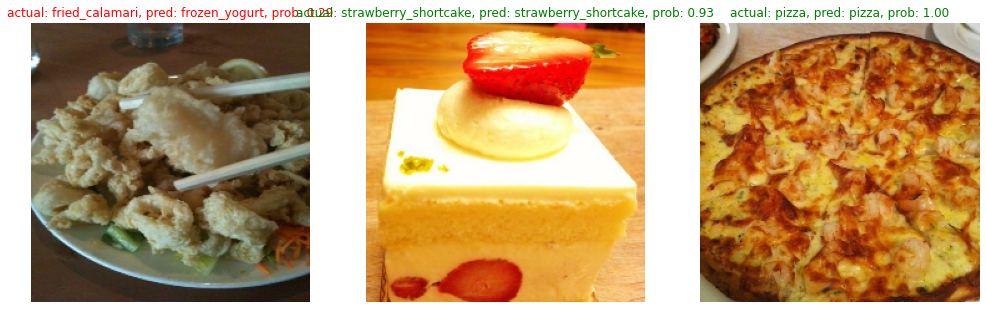

In [ ]:
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class 
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename
  print(filepath)

  # Load the image and make predictions
  img = image_prep(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

In [ ]:
filepaths = []

for filepath in test_data.list_files("/content/101_food_classes_10_percent/test/*/*.jpg", shuffle = False):
  filepaths.append(filepath.numpy())

filepaths[:10]

[b'/content/101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [ ]:
pred_labels = [i.argmax() for i in predicted_probs]

In [ ]:
pred_wr_df = pd.DataFrame({
    "filepath" : filepaths ,
    "y_true" : y_labels,
    "y_pred" : pred_labels,
    "predicted_conf": predicted_probs.max(axis = 1),
    "true_names": [class_names[i] for i in y_labels],
    "pred_names": [class_names[i] for i in pred_labels]
})

pred_wr_df

,filepath,y_true,y_pred,predicted_conf,true_names,pred_names
0,b'/content/101_food_classes_10_percent/test/ap...,0,52,0.847418,apple_pie,gyoza
1,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.964017,apple_pie,apple_pie
2,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.959259,apple_pie,apple_pie
3,b'/content/101_food_classes_10_percent/test/ap...,0,80,0.658607,apple_pie,pulled_pork_sandwich
4,b'/content/101_food_classes_10_percent/test/ap...,0,79,0.367901,apple_pie,prime_rib
...,...,...,...,...,...,...
25245,b'/content/101_food_classes_10_percent/test/wa...,100,100,0.972823,waffles,waffles
25246,b'/content/101_food_classes_10_percent/test/wa...,100,16,0.878028,waffles,cheese_plate
25247,b'/content/101_food_classes_10_percent/test/wa...,100,100,0.537899,waffles,waffles
25248,b'/content/101_food_classes_10_percent/test/wa...,100,94,0.501949,waffles,strawberry_shortcake


In [ ]:
pred_wr_df["pred_correct"] = pred_wr_df["y_true"] == pred_wr_df["y_pred"]

pred_wr_df.head(3)

,filepath,y_true,y_pred,predicted_conf,true_names,pred_names,pred_correct
0,b'/content/101_food_classes_10_percent/test/ap...,0,52,0.847418,apple_pie,gyoza,False
1,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.964017,apple_pie,apple_pie,True
2,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.959259,apple_pie,apple_pie,True


In [ ]:
df_top100_wrong = pred_wr_df[pred_wr_df["pred_correct"] == False].sort_values("predicted_conf", ascending = False)[:100]
df_top100_wrong.head(4)

,filepath,y_true,y_pred,predicted_conf,true_names,pred_names,pred_correct
21810,b'/content/101_food_classes_10_percent/test/sc...,87,29,0.999997,scallops,cup_cakes,False
231,b'/content/101_food_classes_10_percent/test/ap...,0,100,0.999995,apple_pie,waffles,False
15359,b'/content/101_food_classes_10_percent/test/lo...,61,53,0.999988,lobster_roll_sandwich,hamburger,False
23539,b'/content/101_food_classes_10_percent/test/st...,94,83,0.999987,strawberry_shortcake,red_velvet_cake,False


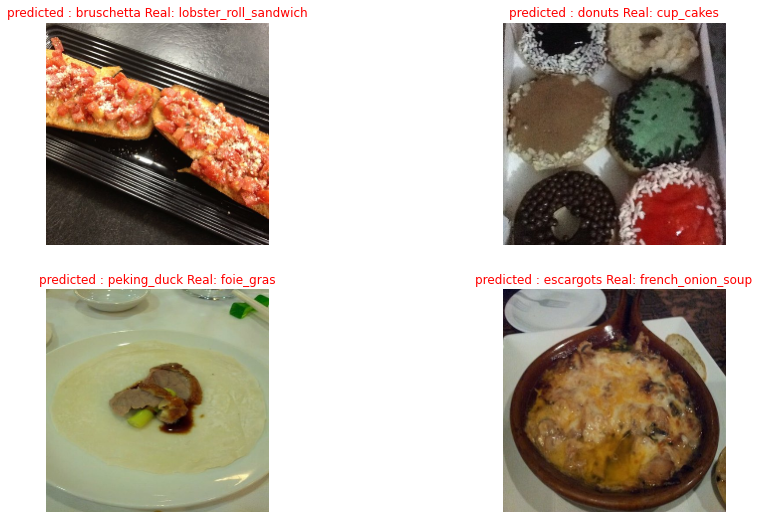

In [ ]:
plt.figure(figsize=(15, 9))

start = 95
stop = start+4

for i in range(start, stop):
  filep = df_top100_wrong.iloc[i].filepath
  img = image_prep(filep, scale = False)
  plt.subplot(2, 2, (i%4)+1)
  plt.imshow(img/255.)
  if(df_top100_wrong.iloc[i].y_true == df_top100_wrong.iloc[i].y_pred):
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"predicted : {df_top100_wrong.iloc[i].true_names} Real: {df_top100_wrong.iloc[i].pred_names}", c=title_color)
  plt.axis(False)